# Getting Started
<hr>

## An introduction to scikit-learn

Since its release in 2007, scikit-learn has become one of the most popular open
source machine learning libraries for Python. scikit-learn provides algorithms for
machine learning tasks including classification, regression, dimensionality reduction,
and clustering. It also provides modules for extracting features, processing data,
and evaluating models.

Conceived as an extension to the SciPy library, scikit-learn is built on the popular
Python libraries NumPy and matplotlib. NumPy extends Python to support efficient
operations on large arrays and multidimensional matrices. matplotlib provides
visualization tools, and SciPy provides modules for scientific computing.
scikit-learn is popular for academic research because it has a well-documented,
easy-to-use, and versatile API. Developers can use scikit-learn to experiment with
different algorithms by changing only a few lines of the code. scikit-learn wraps
some popular implementations of machine learning algorithms, such as LIBSVM
and LIBLINEAR. Other Python libraries, including NLTK, include wrappers for
scikit-learn. scikit-learn also includes a variety of datasets, allowing developers to
focus on algorithms rather than obtaining and cleaning data.

Licensed under the permissive BSD license, scikit-learn can be used in commercial
applications without restrictions. Many of scikit-learn's algorithms are fast and
scalable to all but massive datasets. Finally, scikit-learn is noted for its reliability;
much of the library is covered by automated tests.

## Estimators

Given a scikit-learn *estimator* object named `model`, the following methods are available:

- Available in **all Estimators**
  + `model.fit()` : fit training data. For supervised learning applications,
    this accepts two arguments: the data `X` and the labels `y` (e.g. `model.fit(X, y)`).
    For unsupervised learning applications, this accepts only a single argument,
    the data `X` (e.g. `model.fit(X)`).
- Available in **supervised estimators**
  + `model.predict()` : given a trained model, predict the label of a new set of data.
    This method accepts one argument, the new data `X_new` (e.g. `model.predict(X_new)`),
    and returns the learned label for each object in the array.
  + `model.predict_proba()` : For classification problems, some estimators also provide
    this method, which returns the probability that a new observation has each categorical label.
    In this case, the label with the highest probability is returned by `model.predict()`.
  + `model.score()` : for classification or regression problems, most (all?) estimators implement
    a score method.  Scores are between 0 and 1, with a larger score indicating a better fit.
- Available in **unsupervised estimators**
  + `model.predict()` : predict labels in clustering algorithms.
  + `model.transform()` : given an unsupervised model, transform new data into the new basis.
    This also accepts one argument `X_new`, and returns the new representation of the data based
    on the unsupervised model.
  + `model.fit_transform()` : some estimators implement this method,
    which more efficiently performs a fit and a transform on the same input data.


## Getting started
Assuming that you have Python already installed (everything at least as recent as 2.7
should be fine), we need to install NumPy and SciPy for numerical operations, as well
as matplotlib for visualization.

## Introduction to NumPy, SciPy, and matplotlib

Before we can talk about concrete machine learning algorithms, we have to talk
about how best to store the data we will chew through. This is important as the most
advanced learning algorithm will not be of any help to us if it will never finish. This
may be simply because accessing the data is too slow. Or maybe its representation
forces the operating system to swap all day. Add to this that Python is an interpreted
language (a highly optimized one, though) that is slow for many numerically
heavy algorithms compared to C or FORTRAN. So we might ask why on earth so
many scientists and companies are betting their fortune on Python even in highly
computation-intensive areas?

The answer is that, in Python, it is very easy to off-load number crunching tasks to
the lower layer in the form of C or FORTRAN extensions. And that is exactly what
NumPy and SciPy do (http://scipy.org/Download). In this tandem, NumPy
provides the support of highly optimized multidimensional arrays, which are the
basic data structure of most state-of-the-art algorithms. SciPy uses those arrays to
provide a set of fast numerical recipes. Finally, matplotlib (http://matplotlib.
org/) is probably the most convenient and feature-rich library to plot high-quality
graphs using Python.

### * Modules  : Numpy,Scipy,Matplotlib... *

___

## Our first machine learning method – 

# Supervised Learning: Classification

To get a grip on the problem of machine learning in scikit-learn, we will start with a
very simple machine learning problem: we will try to predict the Iris flower species
using only two attributes: sepal width and sepal length. This is an instance of a
classification problem, where we want to assign a label (a value taken from a discrete
set) to an item according to its features.

Let's first build our training dataset—a subset of the original sample, represented by
the two attributes we selected and their respective target values. After importing the
dataset, we will randomly select about 75 percent of the instances, and reserve the
remaining ones (the evaluation dataset) for evaluation purposes (we will see later
why we should always do that):

In [63]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

# Get dataset with only the first two attributes
X, y = X_iris[:,:2], y_iris
# Split the dataset into a trainig and a testing set
# Test set will be the 25% taken randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)
print X_train.shape, y_train.shape
# Standarize the features
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

(112L, 2L) (112L,)


The train_test_split function automatically builds the training and evaluation
datasets, randomly selecting the samples. Why not just select the first 112 examples?
This is because it could happen that the instance ordering within the sample could
matter and that the first instances could be different to the last ones. In fact, if you
look at the Iris datasets, the instances are ordered by their target class, and this
implies that the proportion of 0 and 1 classes will be higher in the new training set,
compared with that of the original dataset. We always want our training data to be a
representative sample of the population they represent.
The last three lines of the previous code modify the training set in a process usually
called feature scaling. For each feature, calculate the average, subtract the mean
value from the feature value, and divide the result by their standard deviation. After
scaling, each feature will have a zero average, with a standard deviation of one. This
standardization of values (which does not change their distribution, as you could
verify by plotting the X values before and after scaling) is a common requirement of
machine learning methods, to avoid that features with large values may weight too
much on the final results.

Now, let's take a look at how our training instances are distributed in the twodimensional
space generated by the learning feature. pyplot, from the matplotlib
library, will help us with this:

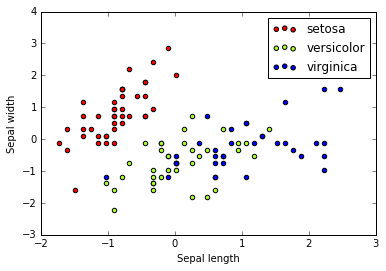

In [64]:
colors = ['red', 'greenyellow', 'blue']
for i in xrange(len(colors)):
    px = X_train[:, 0][y_train == i]
    py = X_train[:, 1][y_train == i]
    plt.scatter(px, py, c=colors[i])

plt.legend(iris.target_names)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

The scatter function simply plots the first feature value (sepal width) for each
instance versus its second feature value (sepal length) and uses the target class
values to assign a different color for each class. This way, we can have a pretty good
idea of how these attributes contribute to determine the target class. The following
screenshot shows the resulting plot.

Looking at the preceding screenshot, we can see that the separation between the red
dots (corresponding to the Iris setosa) and green and blue dots (corresponding to the
two other Iris species) is quite clear, while separating green from blue dots seems a
very difficult task, given the two features available. This is a very common scenario:
one of the first questions we want to answer in a machine learning task is if the
feature set we are using is actually useful for the task we are solving, or if we need to
add new attributes or change our method.

Given the available data, let's, for a moment, redefine our learning task: suppose
we aim, given an Iris flower instance, to predict if it is a setosa or not. We have
converted our problem into a binary classification task (that is, we only have two
possible target classes).

If we look at the picture, it seems that we could draw a straight line that correctly
separates both the sets (perhaps with the exception of one or two dots, which
could lie in the incorrect side of the line). This is exactly what our first classification
method, linear classification models, tries to do: build a line (or, more generally, a
hyperplane in the feature space) that best separates both the target classes, and use
it as a decision boundary (that is, the class membership depends on what side of the
hyperplane the instance is).

To implement linear classification, we will use the SGDClassifier from scikit-learn.
SGD stands for Stochastic Gradient Descent, a very popular numerical procedure
to find the local minimum of a function (in this case, the loss function, which
measures how far every instance is from our boundary). The algorithm will learn the
coefficients of the hyperplane by minimizing the loss function.

To use any method in scikit-learn, we must first create the corresponding classifier
object, initialize its parameters, and train the model that better fits the training data.
You will see while you advance in this book that this procedure will be pretty much
the same for what initially seemed very different tasks.

In [65]:
# create the linear model classifier
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
# fit (train) the classifier
clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

The SGDClassifier initialization function allows several parameters. For the
moment, we will use the default values, but keep in mind that these parameters
could be very important, especially when you face more real-world tasks, where the
number of instances (or even the number of attributes) could be very large. The fit
function is probably the most important one in scikit-learn. It receives the training
data and the training classes, and builds the classifier. Every supervised learning
method in scikit-learn implements this function.

What does the classifier look like in our linear model method? As we have already
said, every future classification decision depends just on a hyperplane. That
hyperplane is, then, our model. The coef_ attribute of the clf object (consider, for
the moment, only the first row of the matrices), now has the coefficients of the linear
boundary and the intercept_ attribute, the point of intersection of the line with the
y axis. Let's print them:

In [66]:
# print learned coeficients
print clf.coef_
print clf.intercept_

[[-30.79833395  15.06870628]
 [  0.74533565  -4.07000427]
 [ 13.17646958   1.50202538]]
[-18.46357161  -2.26800646 -16.31131755]


Indeed in the real plane, with these three values, we can draw a line, represented by
the following equation:
    
>_ -17.62477802 - 28.53692691 * x1 + 15.05517618 * x2 = 0 _

Now, given x1 and x2 (our real-valued features), we just have to compute the value
of the left-side of the equation: if its value is greater than zero, then the point is
above the decision boundary (the red side), otherwise it will be beneath the line (the
green or blue side). Our prediction algorithm will simply check this and predict the
corresponding class for any new iris flower.

But, why does our coefficient matrix have three rows? Because we did not tell the
method that we have changed our problem definition (how could we have done
this?), and it is facing a three-class problem, not a binary decision problem. What, in
this case, the classifier does is the same we did—it converts the problem into three
binary classification problems in a one-versus-all setting (it proposes three lines that
separate a class from the rest).

The following code draws the three decision boundaries and lets us know if they
worked as expected:

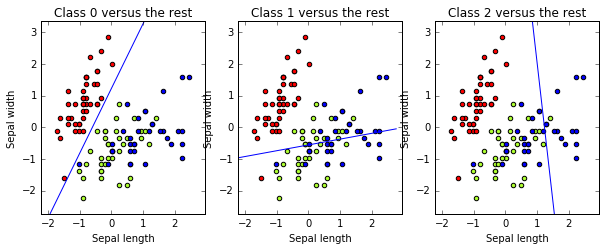

In [67]:
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
xs = np.arange(x_min,x_max,0.5)
fig, axes = plt.subplots(1,3)
fig.set_size_inches(10,6)
for i in [0,1,2]:
    axes[i].set_aspect('equal')
    axes[i].set_title('Class ' + str(i) + ' versus the rest')
    axes[i].set_xlabel('Sepal length')
    axes[i].set_ylabel('Sepal width')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    plt.sca(axes[i])
    for j in xrange(len(colors)):
        px = X_train[:, 0][y_train == j]
        py = X_train[:, 1][y_train == j]
        plt.scatter(px, py, c=colors[j])
    ys = (-clf.intercept_[i]-xs*clf.coef_[i,0])/clf.coef_[i,1]
    plt.plot(xs,ys,hold=True)

The first plot shows the model built for our original binary problem. It looks like
the line separates quite well the Iris setosa from the rest. For the other two tasks, as
we expected, there are several points that lie on the wrong side of the hyperplane.
Now, the end of the story: suppose that we have a new flower with a sepal width of
4.7 and a sepal length of 3.1, and we want to predict its class. We just have to apply
our brand new classifier to it (after normalizing!). The predict method takes
an array of instances (in this case, with just one element) and returns a list of
predicted classes:

In [68]:
print clf.predict(scaler.transform([[4.7, 3.1]]))

[0]


If our classifier is right, this Iris flower is a setosa. Probably, you have noticed that
we are predicting a class from the possible three classes but that linear models are
essentially binary: something is missing. You are right. Our prediction procedure
combines the result of the three binary classifiers and selects the class in which it is
more confident. In this case, we will select the boundary line whose distance to the
instance is longer. We can check that using the classifier decision_function method:

In [69]:
print clf.decision_function(scaler.transform([[4.7, 3.1]]))

[[ 21.74978749  -3.59105443 -32.76527648]]


## Evaluating our results
We want to be a little more formal when we talk about a good classifier. What does
that mean? The performance of a classifier is a measure of its effectiveness. The
simplest performance measure is accuracy: given a classifier and an evaluation
dataset, it measures the proportion of instances correctly classified by the classifier.
First, let's test the accuracy on the training set:

In [70]:
from sklearn import metrics
y_train_pred = clf.predict(X_train)
print metrics.accuracy_score(y_train, y_train_pred)

0.830357142857


This figure tells us that 82 percent of the training set instances are correctly classified
by our classifier.

Probably, the most important thing you should learn from this chapter is that
measuring accuracy on the training set is really a bad idea. You have built your
model using this data, and it is possible that your model adjusts well to them but
performs poorly in future (previously unseen data), which is its purpose. This
phenomenon is called overfitting, and you will see it now and again while you
read this book. If you measure based on your training data, you will never detect
overfitting. So, never measure based on your training data.

This is why we have reserved part of the original dataset (the testing partition)—we
want to evaluate performance on previously unseen data. Let's check the accuracy
again, now on the evaluation set (recall that it was already scaled):

In [71]:
y_pred = clf.predict(X_test)
print metrics.accuracy_score(y_test, y_pred)

0.605263157895


We obtained an accuracy of 68 percent in our testing set. Usually, accuracy on the
testing set is lower than the accuracy on the training set, since the model is actually
modeling the training set, not the testing set. Our goal will always be to produce
models that avoid overfitting when trained over a training set, so they have enough
generalization power to also correctly model the unseen data.

Accuracy on the test set is a good performance measure when the number of instances
of each class is similar, that is, we have a uniform distribution of classes. But if you
have a skewed distribution (say, 99 percent of the instances belong to one class), a
classifier that always predicts the majority class could have an excellent performance in
terms of accuracy despite the fact that it is an extremely naive method.


Within scikit-learn, there are several evaluation functions; we will show three
popular ones: precision, recall, and F1-score (or f-measure). They assume a binary
classification problem and two classes—a positive one and a negative one. In our
example, the positive class could be Iris setosa, while the other two will be combined
into one negative class.

* Precision: This computes the proportion of instances predicted as positives that were correctly evaluated (it measures how right our classifier is when it says that an instance is positive).
* Recall: This counts the proportion of positive instances that were correctly evaluated (measuring how right our classifier is when faced with a positive instance).
* F1-score: This is the harmonic mean of precision and recall, and tries to combine both in a single number.

We can define these measures in terms of True and False, and Positives and Negatives:
                    <pre>
                                 | <b>Prediction: Positive           </b>|<b> Prediction: Negative </b>
                    Target cass: | Positive True Positive  (TP)   | False Negative (FN)
                    Target cass: | Negative False Positive (FP)   | True Negative (TN)
                    </pre>

With m being the sample size (that is, TP + TN + FP + FN), we have the
following formulae:

* Accuracy = (TP + TN) / m
* Precision = TP / (TP + FP)
* Recall = TP / (TP + FN)
* F1-score = 2 * Precision * Recall / (Precision + Recall)

Let's see it in practice:

In [72]:
print metrics.classification_report(y_test, y_pred, target_names=iris.target_names)

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00         8
 versicolor       0.42      1.00      0.59        11
  virginica       1.00      0.21      0.35        19

avg / total       0.83      0.61      0.56        38



We have computed precision, recall, and f1-score for each class and their average
values. What we can see in this table is:
* The classifier obtained 1.0 precision and recall in the setosa class. This means that for precision, 100 percent of the instances that are classified as setosa are really setosa instances, and for recall, that 100 percent of the setosa instances were classified as setosa.
* On the other hand, in the versicolor class, the results are not as good: we have a precision of 0.43, that is, only 43 percent of the instances that are classified as versicolor are really versicolor instances. Also, for versicolor, we have a recall of 0.27, that is, only 27 percent of the versicolor instances are correctly classified.

Now, we can see that our method (as we expected) is very good at predicting
setosa, while it suffers when it has to separate the versicolor or virginica
classes. The support value shows how many instances of each class we had in the
testing set.

Another useful metric (especially for multi-class problems) is the confusion matrix:
in its (i, j) cell, it shows the number of class instances i that were predicted to
be in class j. A good classifier will accumulate the values on the confusion matrix
diagonal, where correctly classified instances belong.

In [73]:
print metrics.confusion_matrix(y_test, y_pred)

[[ 8  0  0]
 [ 0 11  0]
 [ 0 15  4]]


Our classifier is never wrong in our evaluation set when it classifies class 0 (setosa)
flowers. But, when it faces classes 1 and 2 flowers (versicolor and virginica), it
confuses them. The confusion matrix gives us useful information to know what types
of errors the classifier is making.

To finish our evaluation process, we will introduce a very useful method known
as cross-validation. As we explained before, we have to partition our dataset into
a training set and a testing set. However, partitioning the data, results such that
there are fewer instances to train on, and also, depending on the particular partition
we make (usually made randomly), we can get either better or worse results.
Cross-validation allows us to avoid this particular case, reducing result variance and
producing a more realistic score for our models. The usual steps for k-fold
cross-validation are the following:

1. Partition the dataset into k different subsets.
2. Create k different models by training on k-1 subsets and testing on theremaining subset.
3. Measure the performance on each of the k models and take the average measure.

Let's do that with our linear classifier. First, we will have to create a composite
estimator made by a pipeline of the standardization and linear models. With this
technique, we make sure that each iteration will standardize the data and then
train/test on the transformed data. The Pipeline class is also useful to simplify
the construction of more complex models that chain-multiply the transformations.

We will chose to have k = 5 folds, so each time we will train on 80 percent of the
data and test on the remaining 20 percent. Cross-validation, by default, uses accuracy
as its performance measure, but we could select the measurement by passing any
scorer function as an argument.

In [74]:
from sklearn.cross_validation import cross_val_score, KFold
from sklearn.pipeline import Pipeline

# create a composite estimator made by a pipeline of the standarization and the linear model
clf = Pipeline([
        ('scaler', StandardScaler()),
        ('linear_model', SGDClassifier())
])
# create a k-fold croos validation iterator of k=5 folds
cv = KFold(X.shape[0], 5, shuffle=True, random_state=33)
# by default the score used is the one returned by score method of the estimator (accuracy)
scores = cross_val_score(clf, X, y, cv=cv)
print scores

[ 0.76666667  0.63333333  0.76666667  0.76666667  0.9       ]


We obtained an array with the k scores. We can calculate the mean and the standard
error to obtain a final figure:

In [75]:
from scipy.stats import sem

def mean_score(scores):
    """Print the empirical mean score and standard error of the mean."""
    return ("Mean score: {0:.3f} (+/-{1:.3f})").format(
        np.mean(scores), sem(scores))

print mean_score(scores)

Mean score: 0.767 (+/-0.042)


Our model has an average accuracy of 0.76.

___
## Unsupervised Learning: Clustering

Sometimes, is possible to take an unlabeled training set and try to find a hidden structure or patterns in the data: there is no given target class to predict or to evaluate the resulting model. We call these class of machine learning tasks _unsupervised learning_. For instance, _clustering_ methods try to group instances into subsets (called clusters): an instance should be similar to another in the same subset and different from those belonging to another subset.

In this section, we will perform clustering of the Iris data set, to see if we could group instances using their petal and sepal width and length. The trainig set is the same we used we used for our last example on supervised classification.

K-means is probably the most popular clustering algorithm, because it is very simple and easy to implement, and it has shown good performance on different tasks. It belongs to the class of partition algorithms that simultaneously partition data points into distinct groups, called clusters. We will apply k-means to the training data, using only sepal dimensions, building 3 clusters (note that we could have selected a different number of cluster to group data into)



In [89]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_iris, y_iris, test_size=0.25, random_state=33)
    
# Standarize the features
scaler = StandardScaler().fit(X_train4)
X_train4 = scaler.transform(X_train4)
X_test4 = scaler.transform(X_test4)

In [90]:
from sklearn import cluster
clf_sepal = cluster.KMeans(init='k-means++', n_clusters=3, random_state=33)
clf_sepal.fit(X_train4[:,0:2])

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=33, tol=0.0001,
    verbose=0)

We can show the label assigned for each instance (note that this label is a cluster name, it has nothing to do with our original target classes... actually, when you are doing clustering you have no target class!).

In [91]:
print (clf_sepal.labels_)

[1 0 1 1 1 0 0 1 0 2 0 0 1 2 0 2 1 2 1 0 0 1 1 0 0 2 0 1 2 2 1 1 0 0 2 1 0
 1 1 2 1 0 2 0 1 0 2 2 0 2 1 0 0 1 0 0 0 2 1 0 1 0 1 0 1 2 1 1 1 0 1 0 2 1
 0 0 0 0 2 2 0 1 1 2 1 0 0 1 1 1 0 1 1 0 2 1 2 1 2 0 2 0 0 0 1 1 2 1 1 1 2
 0]


Using NumPy's indexing capabilities, we can display the actual target classes for each cluster, just to compare the built clusters with our flower type classes...

In [92]:
print (y_train[clf_sepal.labels_==0])

[0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]


In [93]:
print (y_train[clf_sepal.labels_==1])

[1 1 1 1 1 1 2 1 0 2 1 2 2 1 1 2 2 1 2 2 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 2 1 2 1 1 2 1]


In [94]:
print (y_train[clf_sepal.labels_==2])

[2 2 1 2 2 2 2 1 1 2 2 1 2 2 1 1 2 2 2 2 2 2 1 2 2]


As usually, is a good idea to display our instances and the clusters they belong to, to have a first approximation to how well our algorithm is behaving on our data: 

In [95]:
colormarkers = [ ['red','s'], ['greenyellow','o'], ['blue','x']]
step = .01 
margin = .1   
sl_min, sl_max = X_train4[:, 0].min()-margin, X_train4[:, 0].max() + margin
sw_min, sw_max = X_train4[:, 1].min()-margin, X_train4[:, 1].max() + margin
sl, sw  = np.meshgrid(
    np.arange(sl_min, sl_max, step),
np.arange(sw_min, sw_max, step)
    )
Zs = clf_sepal.predict(np.c_[sl.ravel(), sw.ravel()]).reshape(sl.shape)
centroids_s = clf_sepal.cluster_centers_


Display the data points and the calculated regions

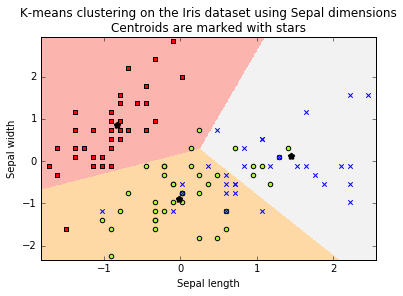

In [96]:
plt.figure(1)
plt.clf()
plt.imshow(Zs, interpolation='nearest', 
           extent=(sl.min(), sl.max(), sw.min(), sw.max()),
           cmap= plt.cm.Pastel1, aspect='auto', origin='lower')
for j in [0,1,2]:
    px = X_train4[:, 0][y_train == j]
    py = X_train4[:, 1][y_train == j]
    plt.scatter(px, py, c=colormarkers[j][0], marker= colormarkers[j][1])
plt.scatter(centroids_s[:, 0], centroids_s[:, 1],marker='*',linewidths=3, color='black', zorder=10)
plt.title('K-means clustering on the Iris dataset using Sepal dimensions\nCentroids are marked with stars')
plt.xlim(sl_min, sl_max)
plt.ylim(sw_min, sw_max)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.show()

Repeat the experiment, using petal dimensions

In [98]:
clf_petal = cluster.KMeans(init='k-means++', n_clusters=3, random_state=33)
clf_petal.fit(X_train4[:,2:4])

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=33, tol=0.0001,
    verbose=0)

In [101]:
print (y_train4[clf_petal.labels_==0])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]


In [102]:
print (y_train4[clf_petal.labels_==1])

[1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1]


In [103]:
print (y_train4[clf_petal.labels_==2])

[2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 2]


Plot the clusters 

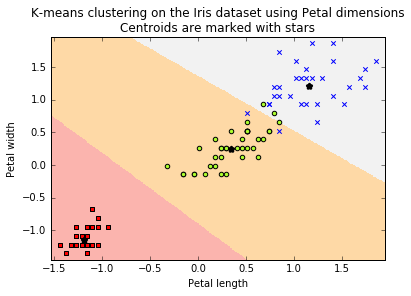

In [104]:
colormarkers = [ ['red','s'], ['greenyellow','o'], ['blue','x']]
step = .01 
margin = .1
sl_min, sl_max = X_train4[:, 2].min()-margin, X_train4[:, 2].max() + margin
sw_min, sw_max = X_train4[:, 3].min()-margin, X_train4[:, 3].max() + margin
sl, sw  = np.meshgrid(
    np.arange(sl_min, sl_max, step),
    np.arange(sw_min, sw_max, step), 
    )
Zs = clf_petal.predict(np.c_[sl.ravel(), sw.ravel()]).reshape(sl.shape)
centroids_s = clf_petal.cluster_centers_
plt.figure(1)
plt.clf()
plt.imshow(Zs, interpolation='nearest', extent=(sl.min(), sl.max(),
                                                sw.min(), sw.max()), cmap= plt.cm.Pastel1, aspect='auto', origin='lower')
for j in [0,1,2]:
    px = X_train4[:, 2][y_train4 == j]
    py = X_train4[:, 3][y_train4 == j]
    plt.scatter(px, py, c=colormarkers[j][0], marker= colormarkers[j][1])
plt.scatter(centroids_s[:, 0], centroids_s[:, 1],marker='*',linewidths=3, color='black', zorder=10)
plt.title('K-means clustering on the Iris dataset using Petal dimensions\nCentroids are marked with stars')
plt.xlim(sl_min, sl_max)
plt.ylim(sw_min, sw_max)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.show()

Now, calculate the clusters, using the four attributes

In [105]:
clf = cluster.KMeans(init='k-means++', n_clusters=3, random_state=33)
clf.fit(X_train4)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=33, tol=0.0001,
    verbose=0)

In [106]:
print (y_train[clf.labels_==0])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]


In [107]:
print (y_train[clf.labels_==1])

[1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 2 1]


In [108]:
print (y_train[clf.labels_==2])

[2 2 1 2 2 1 2 2 1 2 2 2 1 2 1 2 2 2 1 2 2 2 2 2 1 1 2 2 2 2 2 2 2 1 2 2]


Measure precision & recall in the testing set, using all attributes, and using only petal measures

In [110]:
y_pred=clf.predict(X_test4)
print (metrics.classification_report(y_test, y_pred, target_names=['setosa','versicolor','virginica']))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00         8
 versicolor       0.64      0.64      0.64        11
  virginica       0.79      0.79      0.79        19

avg / total       0.79      0.79      0.79        38



In [111]:
y_pred_petal=clf_petal.predict(X_test4[:,2:4])
print (metrics.classification_report(y_test, y_pred_petal, target_names=['setosa','versicolor','virginica']))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00         8
 versicolor       0.85      1.00      0.92        11
  virginica       1.00      0.89      0.94        19

avg / total       0.96      0.95      0.95        38



Wait, every performance measure is better using just two attributes. It is possible that less features give better results? Although at a first glance this seems contradictory, we will see in future notebooks that selecting the right subset of features, a process called feature selection, could actually improve the performance of our algorithms.

# Supervised Learning: Regression
In every example we have seen so far the output we aimed at predicting belonged to a discrete set. For classification, the set was the target class, while for the clustering algorithm the set included different calculated clusters. What if we want to predict a value extracted from the real line?. In this case, we are trying to solve a regression problem. 

To show how regression works in scikit-learn, we will apply to a (very) simple and well-know problem: trying to predict the price of a house given some of its. As the dataset, we will use the Boston house-prices dataset (find the dataset description and attributes [here](http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html).

In [112]:
from sklearn.datasets import load_boston
boston = load_boston()
print ('Boston dataset shape:{}'.format(boston.data.shape))

Boston dataset shape:(506L, 13L)


In [113]:
print (boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


Create training and testing sets, and scale values, as usual

In [115]:
X_train_boston=boston.data
y_train_boston=boston.target
X_train_boston = StandardScaler().fit_transform(X_train_boston)
y_train_boston = StandardScaler().fit_transform(y_train_boston)

C:\Miniconda2\lib\site-packages\sklearn\preprocessing\data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Miniconda2\lib\site-packages\sklearn\preprocessing\data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


Create a method for training and evaluating a model. This time, to evaluate our model we will a different approach: instead of separating the training set, we will use _cross-validation_. 

Cross-validation usually involves the following steps:
1. Partition the dataset into k different subsets.
2. Create k different models by training on k-1 subsets and testing on the remaining one.
3. Measure the performance of each of the k models and use the average value as you performance value.


In [117]:
def train_and_evaluate(clf, X_train, y_train, folds):
    clf.fit(X_train, y_train)
    print ('Score on training set: {:.2f}'.format(clf.score(X_train, y_train)))
    #create a k-fold cross validation iterator of k=5 folds
    cv = sklearn.cross_validation.KFold(X_train.shape[0], folds, shuffle=True, random_state=33)
    scores = sklearn.cross_validation.cross_val_score(clf, X_train, y_train, cv=cv)
    print ('Average score using {}-fold crossvalidation:{:.2f}'.format(folds,np.mean(scores)))


One of the main advantages of cross-validation is reducing the variance of the evaluation measures. Note that when you have a training and testing set, you result will depend on how you created them. Evaluation within machine learning generally assumes that the distribution of classes on your training and testing sets are similar. If this is not the case, you may get results that are not an accurate measure of the actual classifier’s performance. Cross-validation allows us to mitigate this risk: since we are averaging on k different models built on k different datasets, we are reducing variance and probably producing more realistic performance scores for our models.
Scikit-learn includes a linear model method called linear_model.SGDRegressor , which tries to minimize least squares loss using stochastic gradient descent. We will use it to find the model for Boston house values, and predict a new house value, given its 13 learning features.

In [119]:
import sklearn
from sklearn import linear_model
clf_sgd = linear_model.SGDRegressor(loss='squared_loss', penalty=None, random_state=33)
train_and_evaluate(clf_sgd, X_train_boston, y_train_boston,5)


Score on training set: 0.73
Average score using 5-fold crossvalidation:0.70


If you remember the classification, we used accuracy, the proportion of correctly classified instances in the evaluation set, to summarize in just one number our method’s performance. For regression, accuracy is not a good idea, since we are predicting real values, and it is almost impossible that we may exactly predict the final real value. For regression, the default score function in scikit-learn is the coefficient of determination (or $R^2$ score), which measures the proportion of outcome variation explained by the model.; $R^2$ score ranges from 0 to 1, and reaches its maximum value of 1 when the model perfectly predicts all the target values. 

Let us show the the model  hyperplane coefficients

In [120]:
print(clf_sgd.coef_)

[-0.06777406  0.06767528 -0.04290825  0.08828856 -0.11797833  0.3394894
 -0.01969258 -0.23195707  0.09594823 -0.05271866 -0.19913907  0.10355794
 -0.36852382]


You probably noted the `penalty=None` parameter when we called the method. The penalization parameter for linear regression methods is introduced to avoid overfitting. It does this by penalizing those hyperplanes having some of their coefficients too large, seeking hyperplanes where each feature contributes more or less the same to the predicted value. This parameter is generally the L2 norm (the squared sums of the coefficients) or the L1 norm (the sum of the absolute value of the coefficients). Let us see how our model works if we introduce a L2 penalty:

In [121]:
clf_sgd1 = linear_model.SGDRegressor(loss='squared_loss', penalty='l2', random_state=33)
train_and_evaluate(clf_sgd1, X_train_boston, y_train_boston,folds=5)

Score on training set: 0.73
Average score using 5-fold crossvalidation:0.70


## Summary of the implementation here:
To end with this chapter, we will summarize the main common steps to apply a supervised learning method in scikit-learn:
-	Get your dataset. Select your learning features, and create a 2D data array, with one column for each feature, and one row for each learning instance. Every feature is represented by a real number. Your data probably does not look like that in its original format. In the real world, this the preprocessing stage usually takes a lot of time. In the next chapters we will show several examples of preprocessing different types of data. 
-	Create an instance of an estimator (a classifier or a regressor). In scikit-learn, this corresponds to an object that implements the methods `fit(X,y)` and `predict(T)`. This estimator takes as arguments the model’s parameters. You can set these parameters by hand, or using tools for model selection (we will address this later in this book).
-	Separate you training and testing sets (or, alternatively, use cross-validation)
-	Build the model using the `fit(X,y)` method, being X your training data, and y the corresponding target class. 
-	Evaluate you estimator on the testing data, using the `predict(T)` method, being T your testing dataset.
-	Compare your results with the original target classes, using one of the several measures in the metrics module.

The previous steps are only an overview: scikit-learn offers several additional methods implementing different machine learning operations (such as dimensionality reduction, clustering, or semi-supervised learning), and many dataset transformation methods. 
We would look at most of them in the subsequent sections.
___


## What to do when you are stuck

We try to convey every idea necessary to reproduce the steps throughout this
website. Nevertheless, there will be situations where you are stuck. The reasons
might range from simple typos over odd combinations of package versions to
problems in understanding.

In this situation, there are many different ways to get help. Most likely, your problem
will already be raised and solved in the following excellent Q&A sites:

http://metaoptimize.com/qa: This Q&A site is laser-focused on machine learning
topics. For almost every question, it contains above average answers from machine
learning experts. Even if you don't have any questions, it is a good habit to check it
out every now and then and read through some of the answers.

http://stats.stackexchange.com: This Q&A site is named Cross Validated,
similar to MetaOptimize, but is focused more on statistical problems.

http://stackoverflow.com: This Q&A site is much like the previous ones,
but with broader focus on general programming topics. It contains, for example,
more questions on some of the packages that we will use in this book, such as
SciPy or matplotlib.

http://www.TwoToReal.com: This is the instant Q&A site written by the authors to
support you in topics that don't fit in any of the preceding buckets. If you post your
question, one of the authors will get an instant message if he is online and be drawn
in a chat with you.

As stated in the beginning, this book tries to help you get started quickly on your
machine learning journey. Therefore, we highly encourage you to build up your own
list of machine learning related blogs and check them out regularly. This is the best
way to get to know what works and what doesn't.

The only blog we want to highlight right here is http://blog.kaggle.com, the blog of the Kaggle company, which is carrying out machine learning competitions. Typically, they encourage the winners of the competitions to
write down how they approached the competition, what strategies did not work, and
how they arrived at the winning strategy. Even if you don't read anything else, this is a must.

___